<a href="https://colab.research.google.com/github/apraveen005/machine_learning_with_python/blob/master/Lecture_15_Nov_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as  np

In [2]:
np.random.seed(42)

In [3]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
SampleList=[]
for i in range(100000):
  SampleList.append(np.random.random())
random_numbers=np.array(SampleList)

In [5]:
len(random_numbers)

100000

In [8]:
random_numbers[:100]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

In [10]:
random_numbers1=np.empty(100000)
for i in range(100000):
  random_numbers1[i]=np.random.random()

In [11]:
len(random_numbers1)

100000

In [13]:
import matplotlib.pyplot as plt

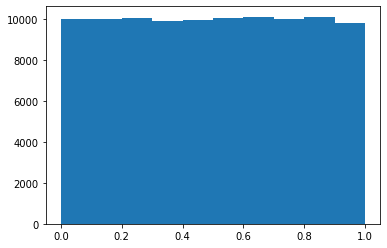

In [16]:
plt.hist(random_numbers)
plt.show()

In [21]:
def bernoulli(n,p):
  n_success=0
  for i in range(n):
    random_number=np.random.random()
    if random_number<p:
      n_success+=1
  return n_success

In [25]:
bernoulli(4,0.5)

2

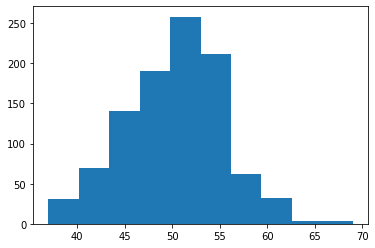

In [29]:
n_defaults=np.empty(1000)
for i in range(1000):
  n_defaults[i]=bernoulli(100,0.5)
plt.hist(n_defaults)
plt.show()

In [31]:
np.random.random(4)

array([0.50013564, 0.20702939, 0.17729528, 0.60563759])

In [32]:
import pandas as pd

In [33]:
survey=pd.read_csv("https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv")

In [34]:
survey.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [35]:
survey.dtypes

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [36]:
survey_numeric=survey.select_dtypes(include=['int64','float64'])

In [37]:
survey_numeric.columns

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')

In [38]:
pd.get_dummies(survey,columns=['Country'],prefix='OH')

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,OH_France,OH_India,OH_Ireland,OH_Russia,OH_South Africa,OH_Spain,OH_Sweeden,OH_UK,OH_USA,OH_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,NaN,Subversion,45,10,Male,NaN,1,0,0,0,0,0,0,0,0,0
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,8.0,Git,27,16,Male,"58,746.00",0,0,0,0,0,1,0,0,0,0
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,NaN,Git,54,16,Male,"$55,000.00",0,0,0,0,0,0,0,0,1,0
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git;Subversion,23,9,NaN,NaN,0,0,0,0,0,0,1,0,0,0


In [40]:
pd.get_dummies(survey,columns=['Country'],prefix='DM',drop_first=True)

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,DM_India,DM_Ireland,DM_Russia,DM_South Africa,DM_Spain,DM_Sweeden,DM_UK,DM_USA,DM_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,NaN,Subversion,45,10,Male,NaN,0,0,0,0,0,0,0,0,0
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,8.0,Git,27,16,Male,"58,746.00",0,0,0,0,1,0,0,0,0
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,NaN,Git,54,16,Male,"$55,000.00",0,0,0,0,0,0,0,1,0
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git;Subversion,23,9,NaN,NaN,0,0,0,0,0,1,0,0,0


In [41]:
countries=survey['Country']

In [42]:
country_counts=survey['Country'].value_counts()

In [45]:
country_counts[country_counts<10].index

Index(['Ukraine', 'Ireland'], dtype='object')

In [46]:
mask=countries.isin(country_counts[country_counts<10].index)

In [47]:
countries[mask]='others'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
countries.value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
others           14
Name: Country, dtype: int64

In [49]:
survey['Paid_Job']=0

In [50]:
survey['ConvertedSalary']>0

0      False
1       True
2      False
3       True
4       True
       ...  
994    False
995     True
996     True
997    False
998     True
Name: ConvertedSalary, Length: 999, dtype: bool

In [51]:
survey.loc[survey['ConvertedSalary']>0,'Paid_Job']=1

In [52]:
survey[['Paid_Job','ConvertedSalary']]

,Paid_Job,ConvertedSalary
0,0,NaN
1,1,70841.0
2,0,NaN
3,1,21426.0
4,1,41671.0
...,...,...
994,0,NaN
995,1,58746.0
996,1,55000.0
997,0,NaN


In [54]:
survey['equal_binned']=pd.cut(survey['ConvertedSalary'],5)

In [55]:
survey[['equal_binned','ConvertedSalary']]

,equal_binned,ConvertedSalary
0,NaN,NaN
1,"(-2000.0, 400000.0]",70841.0
2,NaN,NaN
3,"(-2000.0, 400000.0]",21426.0
4,"(-2000.0, 400000.0]",41671.0
...,...,...
994,NaN,NaN
995,"(-2000.0, 400000.0]",58746.0
996,"(-2000.0, 400000.0]",55000.0
997,NaN,NaN


In [57]:
survey['equal_binned'].value_counts()

(-2000.0, 400000.0]       645
(800000.0, 1200000.0]       9
(400000.0, 800000.0]        6
(1600000.0, 2000000.0]      5
(1200000.0, 1600000.0]      0
Name: equal_binned, dtype: int64

In [58]:
bins=[-np.inf,10000,50000,100000,150000,np.inf]

In [60]:
survey['equal_binned']=pd.cut(survey['ConvertedSalary'],bins,labels=['very low','low','med','high','very high'])

In [62]:
survey[['equal_binned','ConvertedSalary']]

,equal_binned,ConvertedSalary
0,NaN,NaN
1,med,70841.0
2,NaN,NaN
3,low,21426.0
4,low,41671.0
...,...,...
994,NaN,NaN
995,med,58746.0
996,med,55000.0
997,NaN,NaN


In [65]:
survey['new']=pd.cut(survey['ConvertedSalary'],bins=[-np.inf,5000,50000,np.inf],labels=['low','med','high'])

In [66]:
survey['new'].value_counts()

high    363
med     262
low      40
Name: new, dtype: int64

In [67]:
survey[['Age','Gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [68]:
survey[['Age','Gender']].isnull()

,Age,Gender
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
...,...,...
994,False,False
995,False,False
996,False,False
997,False,True


In [69]:
survey[['Age','Gender']].notnull()

,Age,Gender
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True
...,...,...
994,True,True
995,True,True
996,True,True
997,True,False


In [70]:
survey.shape

(999, 15)

In [71]:
no_missing_values_rows=survey.dropna(how='any')

In [72]:
no_missing_values_rows.shape

(264, 15)

In [73]:
no_missing_values_cols=survey.dropna(how='any',axis=1)

In [74]:
no_missing_values_cols.shape

(999, 8)

In [75]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SurveyDate                  999 non-null    object  
 1   FormalEducation             999 non-null    object  
 2   ConvertedSalary             665 non-null    float64 
 3   Hobby                       999 non-null    object  
 4   Country                     999 non-null    object  
 5   StackOverflowJobsRecommend  487 non-null    float64 
 6   VersionControl              999 non-null    object  
 7   Age                         999 non-null    int64   
 8   Years Experience            999 non-null    int64   
 9   Gender                      693 non-null    object  
 10  RawSalary                   665 non-null    object  
 11  Paid_Job                    999 non-null    int64   
 12  ewual_binned                665 non-null    category
 13  equal_binned        

In [76]:
no_gender=survey.dropna(subset=['Gender'])

In [77]:
no_gender.shape

(693, 15)

In [80]:
survey['Gender'].value_counts()

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64

In [84]:
survey['Gender']=survey['Gender'].fillna(value='Not Given')

In [85]:
survey['Gender'].value_counts()

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64

In [86]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SurveyDate                  999 non-null    object  
 1   FormalEducation             999 non-null    object  
 2   ConvertedSalary             665 non-null    float64 
 3   Hobby                       999 non-null    object  
 4   Country                     999 non-null    object  
 5   StackOverflowJobsRecommend  487 non-null    float64 
 6   VersionControl              999 non-null    object  
 7   Age                         999 non-null    int64   
 8   Years Experience            999 non-null    int64   
 9   Gender                      999 non-null    object  
 10  RawSalary                   665 non-null    object  
 11  Paid_Job                    999 non-null    int64   
 12  ewual_binned                665 non-null    category
 13  equal_binned        

In [87]:
survey.shape

(999, 15)